# Task 1

### Imports

In [40]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

#### 1) Build colleration matrix and filter results with corellation > 95 or < -.95

In [41]:
df = pd.read_csv('sp500_27270.csv')

# compute correlations
corr = df.corr()
filtered_companies = [company for company in corr['SP500'].keys() if corr['SP500'][company] > 0.95 or corr['SP500'][company] < -0.95]

# select only the most corrleated companies
df_filtered = df.filter(filtered_companies)

print("Total number of companies staisfying the correlation threshold: ", len(filtered_companies))


Total number of companies staisfying the correlation threshold:  72


#### 2) Split dataset to training and testing

In [42]:
TRAINING_PERCENTAGE = 0.8
TESTING_PERCENTAGE = 0.2
# VALIDATION_PERCENTAGE = 0.5 

# train, test = train_test_split(df_filtered, test_size=TESTING_PERCENTAGE)

# Y_train = list(train['SP500'])
# X_train = train.drop(columns=['SP500'])
# Y_test = list(test['SP500'])
# X_test = test.drop(columns=['SP500'])

# X_scaled = preprocessing.scale(df_filtered.drop(columns=['SP500']))
# Y_scaled = preprocessing.scale(df_filtered['SP500'])
# X_data = np.array(X_scaled)
# Y_data = np.array(Y_scaled)

X_data = np.array(df_filtered.drop(columns=['SP500']))
Y_data = np.array(df_filtered['SP500'])

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)


print("Training chunk length: ", len(train))
print("Testing chunk length: ", len(test))

Training chunk length:  1008
Testing chunk length:  252


#### 3) Choose scoring metric 

In [43]:
# We chose MSE since it's a regression problem and the output range is large and error needs to be minimized
scoring_metric = "neg_mean_squared_log_error"

#### 4) Train the neural network with both the sgd and adam optimizer

In [44]:
print("\n-------------------------Adam-----------------------\n")

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
# score = model.score(X_test, Y_test)
# print("\nScore: ", score)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)

model = MLPRegressor(early_stopping=True, max_iter=100000, hidden_layer_sizes=(100,), random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
# score = model.score(X_test, Y_test)
# print("\nScore:", score)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)

model = MLPRegressor(early_stopping=True, max_iter=100000, hidden_layer_sizes=(1024,), random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
# score = model.score(X_test, Y_test)
# print("\nAccuracy: ", score)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)

# print("\nConcluding learning rate: ", 0.05, " is best")




-------------------------Adam-----------------------

MSLE:  0.020654020534908668
MSLE:  0.023082475545391203
MSLE:  0.00034738495099398485


In [48]:
print("\n-------------------------SGD-----------------------\n")

model = MLPRegressor(early_stopping=True, hidden_layer_sizes=(1024,2), max_iter=10000, random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
# score = model.score(X_test, Y_test)
# print("R2 Score: ", score)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)


model = MLPRegressor(early_stopping=True, max_iter=10000, hidden_layer_sizes=(1024,4,2), random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
# score = model.score(X_test, Y_test)
# print("\nAccuracy: ", score)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)

print("\nConcluding SGD is worse in general")



-------------------------SGD-----------------------

MSLE:  0.02129613859612269
MSLE:  5256.317721958494

Concluding SGD is worse in general


In [49]:
param_grid = {'learning_rate' : ['adaptive', 'constant'],
              'solver': ['sgd', 'adam'],
              'learning_rate_init': [0.05, 0.001],
              'hidden_layer_sizes': [(1024,), (1024, 2)]
             }


print("\nUsing grid search to find the best params: \n")
gs = GridSearchCV(model, param_grid=param_grid, verbose=20, scoring=scoring_metric)
gs.fit(X_train, Y_train)
print(gs.best_params_)
score = gs.score(X_test, Y_test)
print("Score: ", score)




Using grid search to find the best params: 

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] hidden_layer_sizes=(1024,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 


/home/ameniawy/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
print("Finally using best params\n")

model = MLPRegressor(early_stopping=True, max_iter=100000, hidden_layer_sizes=(1024,), random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nScore: ", score)
MSE = mean_squared_log_error(Y_test, y_predictions)
print("MSE: ", MSE)

Finally using best params


Score:  0.9827375520341773
MSE:  0.00034738495099398485


#### 5) Indicate which regularization technique you use to avoid overfitting.

We used early stopping to stop the the training when the validation error stops decreasing or the change is slow. Not stop might cause the validation error to increase.

#### 6) Which optimizer performs better in this task? Why?

In [51]:
cross_score = cross_val_score(model, X_test, Y_test, scoring=scoring_metric)
print("Validation score: ", cross_score)

Validation score:  [-0.03050973 -0.04768474 -0.02259579]


In [52]:
cross_score.mean()

-0.03359675356503276

Adam is the best optimizer because that's what the GridSearch tells us. overall, it has lowest training error/loss

#### 7) Plotting predicted vs actual Y values

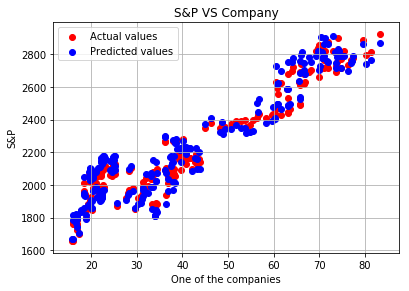

In [53]:
fig = plt.figure()
ax = fig.add_axes([1,0.1,0.8,0.8])
ax.scatter(X_test[:,1], Y_test, c='r', label='Actual values')
ax.scatter(X_test[:,1], y_predictions, c='b', label='Predicted values')

ax.grid()
ax.legend(loc='best')
ax.set_xlabel('One of the companies')
ax.set_ylabel('S&P')
ax.set_title('S&P VS Company')

plt.show()

#### 8) Comment on the points where the prediction and true values mismatch most

# Task 2

#### 1) get most correlated company

In [57]:
max_corr = -100
max_company = ''

for i in corr['SP500'].keys():
    if corr['SP500'][i] > max_corr and i != 'SP500':
        max_corr = corr['SP500'][i]
        max_company = i
        
        
print(max_company)
print(max_corr)

max_company_data = df[max_company]
# print(max_company_data)

APH
0.9883608178608217


#### 2) prepare input and output data set of days using shifting

In [58]:
# print(type(max_company_data))
# print(max_company_data)
# print(max_company_data.shift(-1))
# print(len(max_company_data))

X_data = []
Y_data = []

for iter in range(len(max_company_data) - 9):
    # get first 5 days for input
    X_data.append(list(max_company_data)[:5])
    # get following for days for output
    Y_data.append(list(max_company_data)[5:9])
    # shift data upwards by one step
    max_company_data = max_company_data.shift(-1)
    
# print(X_data)
    


#### 3) split dataset into test and train

In [59]:
TRAINING_PERCENTAGE = 0.8
TESTING_PERCENTAGE = 0.2
# VALIDATION_PERCENTAGE = 0.5 

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_filtered, test_size=TESTING_PERCENTAGE)
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)

print("Training chunk length: ", len(X_train))
print("Testing chunk length: ", len(X_test))
# print(X_train)

Training chunk length:  1000
Testing chunk length:  251


#### 4) Create model and fit 

In [60]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(early_stopping=True, random_state=1)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("Score: ", score)

Score:  0.973989288038467


In [61]:
# We chose MSE since it's a regression problem and the output range is acceptable, so no need for using mean squared log error
scoring_metric = "neg_mean_squared_error"

In [63]:
param_grid = {'learning_rate' : ['adaptive', 'constant'],
              'solver': ['sgd', 'adam'],
              'learning_rate_init': [0.05, 0.001],
              'hidden_layer_sizes': [(256, 512), (100,2)]
             }


gs = GridSearchCV(model, param_grid=param_grid, verbose=20, scoring=scoring_metric)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-1.7728716710491572e+79, total=   0.7s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-1.1634540173724187e+78, total=   0.6s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-2.5959852809960744e+78, total=   0.6s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-13.242352944903438, total=   0.2s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-28.137926669842145, total=   0.2s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-76.17110208838987, total=   0.1s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-9.558615390102884e+65, total=   0.3s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.8s remaining:    0.0s
/home/ameniawy/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_base.py:194: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Get best params

In [88]:
print(gs.best_params_)
score = gs.score(X_test, y_test)
print("Score: ", score)

{'hidden_layer_sizes': (100, 2), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
Score:  -1.8329937132496845


#### 5) Evaluate model with grid search best params

In [64]:
model = MLPRegressor(early_stopping=True, random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam', hidden_layer_sizes=(100,2))

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("Score: ", score)

Score:  0.9942986956039345


In [65]:
y_predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("\nScore: ", score)
MSE = mean_squared_error(y_test, y_predictions)
print("MSE: ", MSE)


Score:  0.9942986956039345
MSE:  1.3807655777446677


#### Try 3 instances

In [66]:
three_instances_x = X_test[:3]
three_instances_y = y_test[:3]
print(three_instances_x)
print(three_instances_y)

three_predictions_y = model.predict(three_instances_x)
print(three_predictions_y)

[[43.6581, 43.6725, 42.4353, 41.1885, 40.9247], [53.6579, 53.3953, 52.9479, 53.23, 52.4324], [57.9904, 58.0491, 57.7944, 57.471000000000004, 58.2059]]
[[41.2844, 41.0638, 41.5625, 41.6632], [51.5474, 53.0355, 52.3935, 53.2981], [57.9414, 57.9806, 58.3235, 58.2549]]
[[42.40709957 42.39912148 42.69683723 42.39282188]
 [53.33174087 53.22342653 53.18137472 53.26727071]
 [58.17721631 58.02439919 57.83164813 58.09048396]]


#### Display 3 Instances

In [67]:
for idx, instance in enumerate(three_predictions_y):
    print("Instance", (str(idx+1)), ":\n")
    for idx2, day in enumerate(instance):
        print("Day ", (str(idx2+1)), ":")
        print("Predicted: ", day, " Actual: ", three_instances_y[idx][idx2])
    print("\n\n")
    

Instance 1 :

Day  1 :
Predicted:  42.407099573828035  Actual:  41.2844
Day  2 :
Predicted:  42.3991214753232  Actual:  41.0638
Day  3 :
Predicted:  42.69683723086716  Actual:  41.5625
Day  4 :
Predicted:  42.392821883415635  Actual:  41.6632



Instance 2 :

Day  1 :
Predicted:  53.33174087437894  Actual:  51.5474
Day  2 :
Predicted:  53.22342652560416  Actual:  53.0355
Day  3 :
Predicted:  53.18137472271805  Actual:  52.3935
Day  4 :
Predicted:  53.267270709950324  Actual:  53.2981



Instance 3 :

Day  1 :
Predicted:  58.17721631112164  Actual:  57.9414
Day  2 :
Predicted:  58.02439918896305  Actual:  57.9806
Day  3 :
Predicted:  57.83164812618527  Actual:  58.3235
Day  4 :
Predicted:  58.09048396038742  Actual:  58.2549





#### Values are close due to the 99% score of the model

# Task 3

## Some context on the TfidVectorizer and text handing in sklearn

* To represent a review to a neural network, each word has to be expressed as a number. 

* Each word in the review corpus is assigned a unique number. Assume the total number of unique words is feature_count. 

* Each review can then be represented as a vector of length feature_count. 

* Entries in this vector can be either 0 or 1, if the word is present in this review or absent respectively. 

* A more advanced approach will replace the binary numbers above with ratios that emphaise how rare ( and hence meanigful and representative ) the word is across all reviews. For example, a word like "product" will have little use for the neural network in determing whetehr this is a rating-1 or rating-5 review, as this particular word occurs in most reviews, both positive and negative ones. 

* Here we limit the number of feature_count to 40,000 to cut down the training time. 

more info available from 
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

#### Read dataset and clean

In [68]:
import pandas as pd

reviews = pd.read_json('reviews_digital.json', lines=True)


In [69]:
print(reviews.groupby('overall').count()['asin'])
print()
frames = []

for i in range(1,6):
    frames.append(reviews[(reviews['overall'] == i)][:2500])

balanced_data = pd.concat(frames)

print(len(balanced_data))

overall
1     2791
2     3010
3     6789
4    16536
5    35580
Name: asin, dtype: int64

12500


#### Split data

In [70]:
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

TESTING_PERCENTAGE = 0.2

X_data = np.array(balanced_data['reviewText'])

# stop_words = set(stopwords.words('english')) 
# X_data_new = []
# for text in X_data:
#     word_tokens = word_tokenize(text)
#     filtered_sentence = [w for w in word_tokens if not w in stop_words]
#     X_data_new.append(' '.join(filtered_sentence))
  

Y_data = np.array(balanced_data['overall'])


X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)


#### Calculate tfidf scores

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#You need to define X_train and X_test
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

# print(X_train_transformed)

In [75]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(early_stopping=True, activation='tanh')

model.fit(X_train_transformed, y_train)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [76]:
print(model.score(X_test_transformed, y_test))

0.6084


In [77]:
from sklearn import model_selection
# seed = 7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)

# Since this is a classification problem then accuracy can be used
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train_transformed, y_train, cv=3, scoring=scoring, verbose=20)

[CV]  ................................................................
[CV] ....................... , score=0.6172765446910617, total=  19.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s remaining:    0.0s


[CV] ....................... , score=0.6175764847030594, total=  20.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.9s remaining:    0.0s


[CV] ....................... , score=0.5870348139255702, total=  17.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.1s finished


In [81]:
print("Accuracy:", results.mean())
print("Standard Deviation:", results.std())

Accuracy: 0.6072959477732304
Standard Deviation: 0.014327308414290555


In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['adam'],
    'activation': ['tanh'],
    'hidden_layer_sizes': [(1024, 128, 2), (128, 2)],
    'early_stopping': [True]
}

grid_search = GridSearchCV(model, param_grid=param_grid, verbose=20, scoring=scoring)

grid_search.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 128, 2), solver=adam 
[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 128, 2), solver=adam, score=0.33653269346130776, total= 3.9min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 128, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 128, 2), solver=adam, score=0.371625674865027, total= 4.0min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 128, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.9min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 128, 2), solver=adam, score=0.28241296518607445, total= 2.4min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.4min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), solver=adam, score=0.40881823635272946, total=  59.6s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.4min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), solver=adam, score=0.40401919616076787, total=  50.4s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 12.2min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(128, 2), solver=adam, score=0.4885954381752701, total=  42.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 12.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 12.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'solver': ['adam'], 'activation': ['tanh'], 'hidden_layer_sizes': [(1024, 128, 2), (128, 2)], 'early_stopping': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=20)

In [84]:
print(grid_search.best_params_)

{'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (128, 2), 'solver': 'adam'}
